# Display utility for 2D FTICR Spectra

*This little utility allows to interactively explore large 2D FTICR-MS datasets.*

You find here a simple interface the reads and displays the multiresolution 2D files created by `SPIKE` when processing 2D data-sets (usually called `xxx_mr.msh5`).

It is based on the capabilities of both the `SPIKE` library and the `jupyter notebook` interface.
Thanks to the technology behind, these extremely large files can be accessed rapidly, even on a laptop computer.

This program supersedes the old `Visu2D` program, developped in `Qt`, which could no longer be maintained.

## To use it, 
execute each executable cell (marked with the `In[]`) either by cliking on the Run icon on the top of the window, or by hitting *shift-Return* on the keyboard

*First initialize the program*

The underlying tools are first loaded.

`SPIKE` should be in your path, being either

- installed at the system wide level
- with the spike directory in the same folder as this program
- with the location of `SPIKE` into the python var `sys.path`

In [1]:
%matplotlib notebook
from spike.Interactive.INTER import FileChooser
from spike.Interactive.FTICR2D_INTER import MR, MR_interact


          SPIKE
    Version     : 0.99.2  
    Date        : 05-03-2019
    Revision Id : 385
*** Importing  << zoom3D >> Failed ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Linear_prediction,  PALMA,  Peaks,  Recital,  apmin,  bcorr,  bokeh_display,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  urQRd,  wavelet, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


one way is to put the name of the xxx_mr.msh5 file into a python variable *not mandatory

In [2]:
ls -lh /DATA/pour\ Florence/

total 3354072
drwxr-xr-x   7 mad  admin   238B Jan  8  2015 ORBITRAP/
drwxr-xr-x   7 mad  admin   238B Dec 13  2015 Oil_from_Bremen/
drwxr-xr-x@ 12 mad  admin   408B Feb 12 15:42 TBO/
-rw-r--r--@  1 mad  admin   248K Aug 10  2018 load1.png
drwx------@  4 mad  admin   136B Aug  9  2018 petrol_Tisane/
-rw-r--r--@  1 mad  staff    71M Aug  9  2018 petrol_Tisane.zip
-rw-r--r--   1 mad  admin   1.5G Sep  1  2017 yeast_extract_p9kk_dn200_small_mr.msh5


In [3]:
FC = FileChooser('/DATA',filetype='*.msh5')

VBox(children=(HBox(children=(Label(value='Chosen dir:  /DATA'), Button(description='Up Directory', style=ButtonStyle()))), HBox(children=(Select(description='Choose Dir', layout=Layout(width='50%'), options=('/DATA/121713-SME881', '/DATA/20130912 orbitrap', '/DATA/4', '/DATA/4 3', '/DATA/Beats Lysozyme', '/DATA/Beats substance P', '/DATA/CASJPS', '/DATA/CD', '/DATA/clé SFB', '/DATA/DATA_T2_LowRes', '/DATA/DOSY-RAR', '/DATA/DOSY_Sumofusion', '/DATA/DOSYF19', '/DATA/Eg_Laurent', '/DATA/EPI-001 WLogsy', '/DATA/FT-ICR', '/DATA/FTIR', '/DATA/HRMAS', '/DATA/HRMAS_Data_RMN_13_Oct_2015', '/DATA/I.1230', '/DATA/INSA', '/DATA/IPREM', '/DATA/KELCKAV_Emmanuel', '/DATA/kinetics', '/DATA/Leo', '/DATA/Lyon', '/DATA/Martial-urQRd', '/DATA/MS-deconv', '/DATA/MS-Orbi', '/DATA/NTD6_NC_SLP_150408_orig&Results', '/DATA/Nucleosomes', '/DATA/NUS-CR-141027', '/DATA/PALMA-debug', '/DATA/PEPTIDE MIX_000001.d', '/DATA/peptidesDOSY', '/DATA/pharma', '/DATA/PK282+BPA-131004', '/DATA/PK282-140217', '/DATA/PLA', '/DATA/PNA', '/DATA/Polypro', '/DATA/Pour conf MS', '/DATA/pour Florence', '/DATA/Prion oscillations', '/DATA/QM', '/DATA/Solarix_1D_harmonized_cell', '/DATA/spectres cal FAB', '/DATA/Stage Thomas 06 2015', '/DATA/SWISS', '/DATA/Terpenes_diffusion_190215', '/DATA/Terpenes_diffusion_190215 2', '/DATA/test_smx', '/DATA/TESTS_BL', '/DATA/TP-RMN-Oléron', '/DATA/TS28-140312', '/DATA/TS28-140318', '/DATA/Valentin'), value='/DATA/121713-SME881'), Button(description='Set Directory', style=ButtonStyle()))), Select(description='Choose File', layout=Layout(width='50%'), options=('/DATA/pour Florence/yeast_extract_p9kk_dn200_small_mr.msh5',), value='/DATA/pour Florence/yeast_extract_p9kk_dn200_small_mr.msh5'), Text(value='', description='File to load', layout=Layout(width='70%'))))

In [4]:
FC.file

''

In [5]:
name='/DATA/pour Florence/yeast_extract_p9kk_dn200_small_mr.msh5'

the `MR` tool simply loads and describe the content of the file

In [6]:
MR(name)

2D data-set
Axis F1 :FT-ICR report axis at 500.000000 kHz,  4096 real points,  from physical mz =  328.209   to m/z = 3000.000  R max (M=400) = 3773
Axis F2: FT-ICR report axis at 1250.000000 kHz,  262144 real points,  from physical mz =  147.411   to m/z = 3000.000  R max (M=400) = 96608
data-set is real
multiresolution data:
#: Size
1: 4096 x 262144 : 1024 Mpix
2: 1024 x 65536 : 64 Mpix
3: 1024 x 16384 : 16 Mpix
4: 1024 x 4096 : 4 Mpix
5: 1024 x 1024 : 1 Mpix


`MR_interact` loads and display the data-set.

It can be called directly

2D data-set
Axis F1 :FT-ICR report axis at 500.000000 kHz,  4096 real points,  from physical mz =  328.209   to m/z = 3000.000  R max (M=400) = 3773
Axis F2: FT-ICR report axis at 1250.000000 kHz,  262144 real points,  from physical mz =  147.411   to m/z = 3000.000  R max (M=400) = 96608
data-set is real
multiresolution data:
#: Size
1: 4096 x 262144 : 1024 Mpix
2: 1024 x 65536 : 64 Mpix
3: 1024 x 16384 : 16 Mpix
4: 1024 x 4096 : 4 Mpix
5: 1024 x 1024 : 1 Mpix


HBox(children=(VBox(children=(Button(description='⍇', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='back in zoom list'), Button(description='◀︎', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='move zoom window to the left'), Button(description='🔍 in', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='zoom in'))), VBox(children=(Button(description='▲', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='move zoom window up'), Button(description='⌘', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='reset display to default'), Button(description='▼', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='move zoom window down'))), VBox(children=(Button(description='⍈', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='forward in zoom list'), Button(description='▶︎', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='move zoom window to the right'), Button(description='🔍out', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='zoom out'))), HTML(value='&nbsp;&nbsp;&nbsp;&nbsp;'), VBox(children=(Button(description='×', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='increase display scale'), Button(description='≡', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='reset display scale'), Button(description='÷', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='decrease display scale'))), HTML(value='&nbsp;&nbsp;&nbsp;&nbsp;'), VBox(children=(HTML(value='Zoom Window (in $m/z$)'), HBox(children=(BoundedFloatText(value=328.21885502618613, description='F1:', layout=Layout(height='30px', width='80px'), max=3000.0, min=328.20885502618614, style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=3000.0, description='..', layout=Layout(height='30px', width='80px'), max=3000.0, min=328.20885502618614, style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=147.4211140582853, description='F2:', layout=Layout(height='30px', width='80px'), max=3000.0, min=147.4111140582853, style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=3000.0, description='..', layout=Layout(height='30px', width='80px'), max=3000.0, min=147.4111140582853, style=DescriptionStyle(description_width='initial')))), Button(description='Update', layout=Layout(width='300px'), style=ButtonStyle(), tooltip='Set zoom to values')))), layout=Layout(height='100px'))

<IPython.core.display.Javascript object>


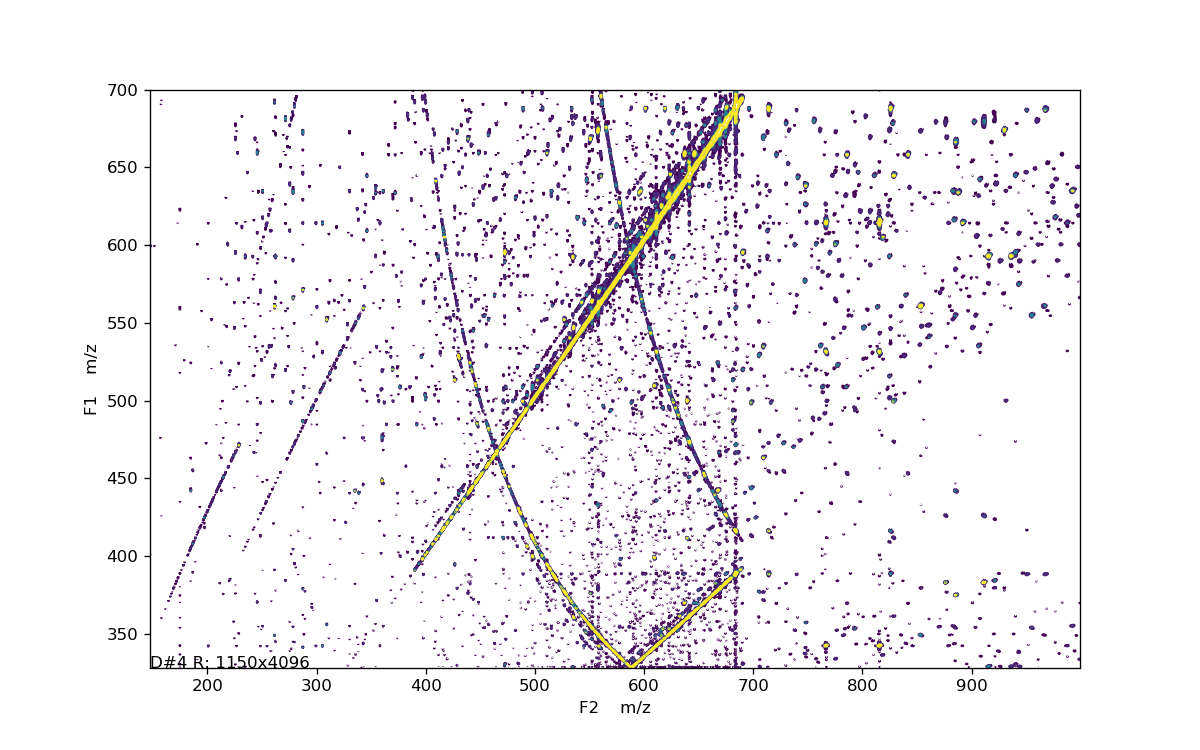

In [13]:
MR_interact(name);

Some options are possible:

- store the view into a python variable (we'll see other usage below)
- store the created view into a python variable
- define behaviour at start-up
- overload the initial view

HBox(children=(VBox(children=(Button(description='⍇', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='back in zoom list'), Button(description='◀︎', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='move zoom window to the left'), Button(description='🔍 in', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='zoom in'))), VBox(children=(Button(description='▲', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='move zoom window up'), Button(description='⌘', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='reset display to default'), Button(description='▼', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='move zoom window down'))), VBox(children=(Button(description='⍈', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='forward in zoom list'), Button(description='▶︎', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='move zoom window to the right'), Button(description='🔍out', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='zoom out'))), HTML(value='&nbsp;&nbsp;&nbsp;&nbsp;'), VBox(children=(Button(description='×', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='increase display scale'), Button(description='≡', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='reset display scale'), Button(description='÷', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='decrease display scale'))), HTML(value='&nbsp;&nbsp;&nbsp;&nbsp;'), VBox(children=(HTML(value='Zoom Window (in $m/z$)'), HBox(children=(BoundedFloatText(value=380.0, description='F1:', layout=Layout(height='30px', width='80px'), max=3000.0, min=328.20885502618614, style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=700.0, description='..', layout=Layout(height='30px', width='80px'), max=3000.0, min=328.20885502618614, style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=380.0, description='F2:', layout=Layout(height='30px', width='80px'), max=3000.0, min=147.4111140582853, style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=700.0, description='..', layout=Layout(height='30px', width='80px'), max=3000.0, min=147.4111140582853, style=DescriptionStyle(description_width='initial')))), Button(description='Update', layout=Layout(width='300px'), style=ButtonStyle(), tooltip='Set zoom to values')))), layout=Layout(height='100px'))

<IPython.core.display.Javascript object>


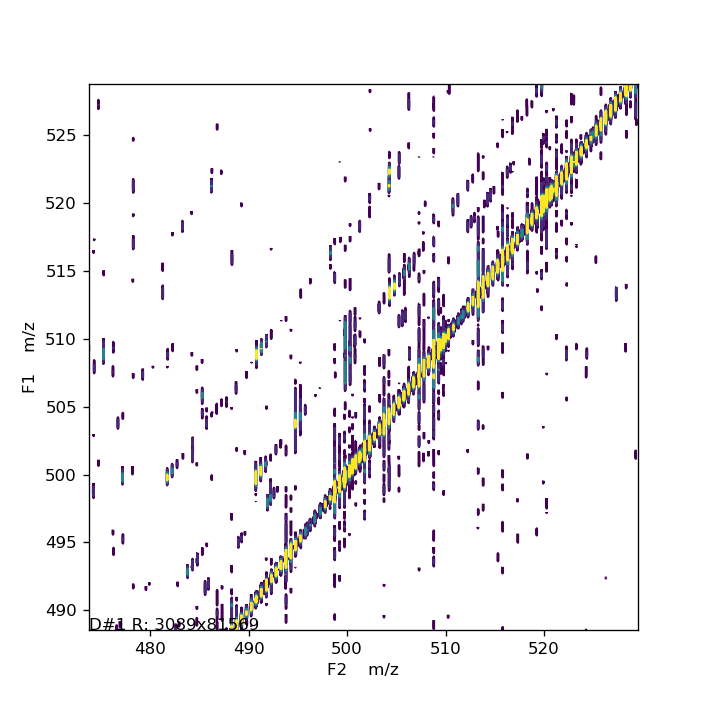

In [14]:
# complete initialisation, and storing the view into a python var
DI = MR_interact('/DATA/pour Florence/yeast_extract_p9kk_dn200_small_mr.msh5',  # can use the name directly
                    report=False,   # inhibits parameter printing
                    show=False,     # does not display on start-up
                    figsize=(15,15),# Size of initial display (in cm)
                    Debug=False     # Enables live debugging if True
                   )
DI._zoom = (380, 700, 380, 700)     # set the initial zoom view, in m/z (F1low , F1High , F2low , F2High)
DI.scale = 3.0                      # set the initial scale
DI.show()                           # and finally show

There is 1D extraction tool which is handy to examine carefully the details

Just use your stored view and append `.I1D()` to it

VBox(children=(HTML(value='Extract 1D MS Spectrum passing by F1-F2 coordinates'), HBox(children=(HTML(value='<B>coord:</B>'), BoundedFloatText(value=328.20885502618614, description='F1', layout=Layout(height='30px', width='120px'), max=3000.0, min=328.20885502618614, style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=300.0, description='F2', layout=Layout(height='30px', width='120px'), max=3000.0, min=147.4111140582853, style=DescriptionStyle(description_width='initial')), Button(description='horiz', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='extract an horizontal row'), Button(description='+1', layout=Layout(width='30px'), style=ButtonStyle(), tooltip='next row up'), Button(description='-1', layout=Layout(width='30px'), style=ButtonStyle(), tooltip='next row down'), HTML(value='&nbsp;/&nbsp;'), Button(description='vert', layout=Layout(width='60px'), style=ButtonStyle(), tooltip='extract a vertical col'), Button(description='+1', layout=Layout(width='30px'), style=ButtonStyle(), tooltip='next col right'), Button(description='-1', layout=Layout(width='30px'), style=ButtonStyle(), tooltip='next col left'), Dropdown(description='Accumulate plots while scanning:', options=('off', 'graphic', 'sum'), style=DescriptionStyle(description_width='initial'), value='off')))))

<IPython.core.display.Javascript object>


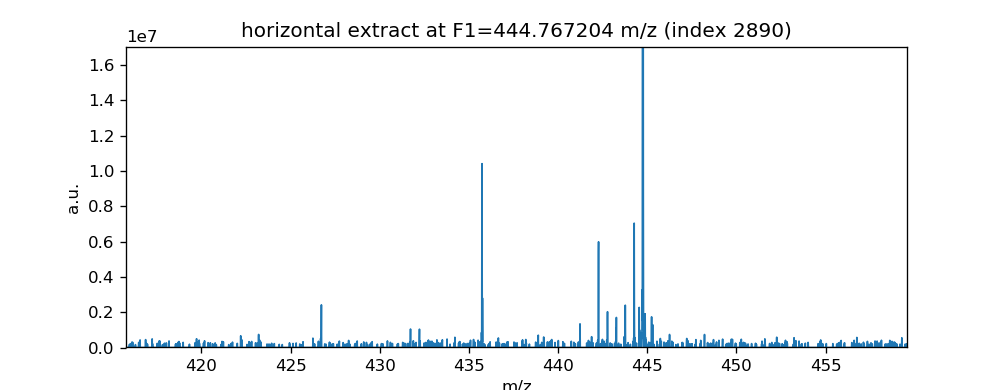

In [11]:
DI.I1D()